In [1]:
#--------------------------------------------------
#  LOAD PACKAGES
#--------------------------------------------------

require(readxl)
require(ggplot2)
require(broom)
#require(viridis)
#require(RColorBrewer)
#library(ggthemes)
#library(scales)
require(plotly)
require(plantecophys)
require(lme4)
#require(plyr)
#require(multiplot)
require(nlme)
#library(tidyr)

Loading required package: readxl
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: broom
Loading required package: plotly
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'plotly'"Loading required package: plantecophys
Loading required package: lme4
Loading required package: Matrix
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList



In [41]:
#--------------------------------------------------
#  LOAD FUNCTIONS
#--------------------------------------------------

setwd('C:/Users/fb428/OneDrive - University of Exeter/Documents/Tropoz/')
source('scripts/gs_functions.R')

f = 'XC1'

#--------------------------------------------------
#  LOAD DATA
#--------------------------------------------------

DATA <- read.csv(gsub(" ", "", paste(f,'/',f,'_Tracking_cleaned.csv')))

DATA$Hrs <- lapply(DATA$HHMMSS, FUN=function(x) as.numeric(strsplit(toString(x), ':')[[1]][1]))

cat('Check variable names ("Pot" should be present): \n')
print(colnames(DATA))

df <- unify_excel_file(DATA)
cat('\n\n  Check all variables are present: \n')
print(colnames(df))

#--------------------------------------------------
#  CALCULATE GS VALUES BALLBERRY
#--------------------------------------------------

daylight <- subset(df[(df$Hrs >= 6 ) & (df$Hrs <= 18) ,], PARi >= 1)
    
BBfit <- fitBB(data = daylight, varnames = list(ALEAF = "Photo", GS = "Cond", VPD = "VpdL", Ca = "CO2S", RH = "RH_S"),
               gsmodel = 'BallBerry', fitg0 = FALSE)

coefs_BB <- coef(BBfit)
cat('\n\n  g1 values for BallBerry model:', coefs_BB[[2]])

preds_BB <- predict(BBfit$fit, data = daylight)
    
fit_stats <- fit_accuracy(BBfit, preds_BB, daylight)
cat('\n\n  r.squared values for BallBerry model:')
fit_stats

#--------------------------------------------------
#  CALCULATE GS VALUES USO MODEL
#--------------------------------------------------
    
USOfit <- fitBB(data = daylight, varnames = list(ALEAF = "Photo", GS = "Cond", VPD = "VpdL", Ca = "CO2S", RH = "RH_S"),
               gsmodel = 'BBOpti', fitg0 = FALSE)

coefs_USO <- coef(USOfit)
cat('\n\n  g1 values for Medlyn model:', coefs_USO[[2]])

preds_USO <- predict(USOfit$fit, data = daylight)
    
fit_stats_USO <- fit_accuracy(USOfit, preds_USO, daylight)
cat('\n\n  r.squared values for Medlyn model:')
fit_stats_USO

#--------------------------------------------------
#  CALCULATE G0 VALUE
#--------------------------------------------------

night <- df[(df$Hrs <= 5) | (df$Hrs >= 19) ,]

g0 <- g0_calc(night)

cat('\n\n  g0 (min conductance in umol mol-1):', g0)

#--------------------------------------------------
#  SUMMARY AND SAVE THINGS
#--------------------------------------------------

save_stats(coefs_BB, fit_stats, coefs_USO, fit_stats_USO, g0, gsub(" ", "", paste(f,'/script_output_',f,'/gs_',f,'.csv')))

Check variable names ("Pot" should be present): 
 [1] "Pot"      "Obs"      "HHMMSS"   "Exp"      "Leaf"     "Repeat"  
 [7] "Chamber"  "FTime"    "EBal."    "Type"     "Photo"    "Cond"    
[13] "Ci"       "Trmmol"   "VpdL"     "CTleaf"   "Area"     "BLC_1"   
[19] "StmRat"   "BLCond"   "Tair"     "Tleaf"    "TBlk"     "CO2R"    
[25] "CO2S"     "H2OR"     "H2OS"     "RH_R"     "RH_S"     "Flow"    
[31] "PARi"     "PARo"     "Press"    "CsMch"    "HsMch"    "StableF" 
[37] "BLCslope" "BLCoffst" "f_parin"  "f_parout" "alphaK"   "Status"  
[43] "fda"      "Trans"    "Tair_K"   "Twall_K"  "R.W.m2."  "Tl.Ta"   
[49] "SVTleaf"  "h2o_i"    "h20diff"  "CTair"    "SVTair"   "CndTotal"
[55] "vp_kPa"   "VpdA"     "CndCO2"   "Ci_Pa"    "Ci.Ca"    "RHsfc"   
[61] "C2sfc"    "AHs.Cs"   "Hrs"      "xRH"      "xTair"    "uc_20_mV"
[67] "uc_21_mV" "Cham_ID" 


  Check all variables are present: 
 [1] "Obs"     "HHMMSS"  "Exp"     "Leaf"    "Chamber" "Pot"     "Photo"  
 [8] "Cond"    "VpdL"    "CO2S

RH provided in % converted to relative units.




  g1 values for BallBerry model: 6.839007

  r.squared values for BallBerry model:

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8385354,0.8383989,0.02334937,6143.684,0,2,2771.823,-5537.647,-5522.414,0.6449631,1183




  g1 values for Medlyn model: 2.360096

  r.squared values for Medlyn model:

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8631168,0.8630011,0.02149867,7459.404,0,2,2869.68,-5733.359,-5718.127,0.5467739,1183




  g0 (min conductance in umol mol-1): 0.02446835

 Save DataFrame[1] "BallBerry" "r2_BB"     "g0_BB"     "Medlyn"    "r2_Medlyn"
saved as:  XC1/script_output_XC1/gs_XC1.csv

png 
  3

png 
  2

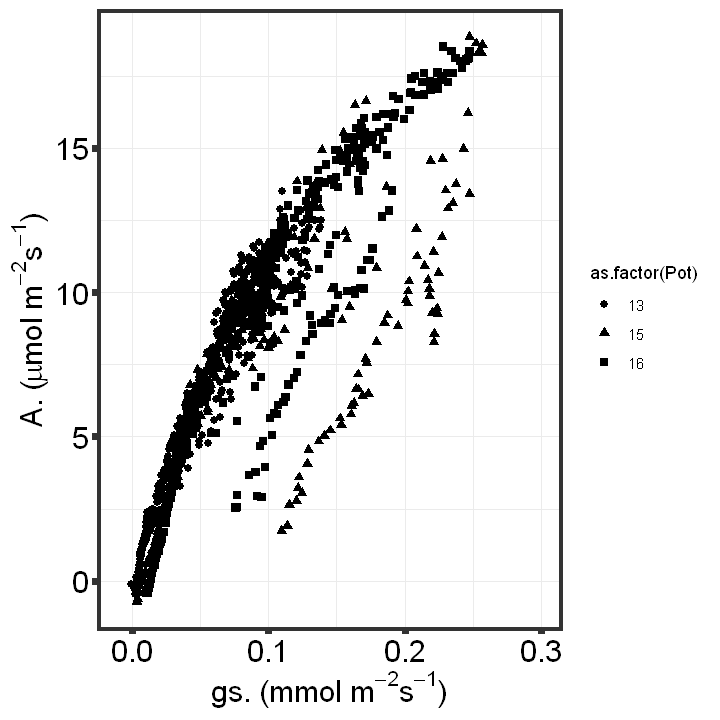

In [42]:
#initial plot of tracking data
ggplot()+
  geom_point(data=daylight,aes(x=Cond,y=Photo, shape = as.factor(Pot)),size=2)+
  #geom_smooth(data=Licor_Track,aes(x=Cond,y=Photo,colour=Chamber),size=2, method = lm, formula = y ~ poly(x,1))+
  #scale_colour_manual(values=c("darkgreen","brown"))+
  scale_x_continuous(limits=c(-0.01,0.3))+
  theme_bw()+
  ylab(expression(paste("A. (",mu,"mol ", m^-2, s^-1,")", sep="")))+
  xlab(expression(paste("gs. (mmol ",m^-2, s^-1,")", sep="")))+
  theme(
    axis.text=element_text(size=18,colour="black"),
    line=element_line(colour="black"),
    axis.title=element_text(size=18),
    #axis.title.x=element_blank(),
    #axis.text.x=element_blank(),
    #axis.text.x = element_text(angle = 90, hjust = 1),
    axis.ticks=element_line(size=2),
    panel.border=element_rect(size=2)
  )

dev.copy(png, gsub(" ", "", paste(f,'/script_output_',f,'/A_gs_',f,'.png')))
dev.off()

png 
  3

png 
  2

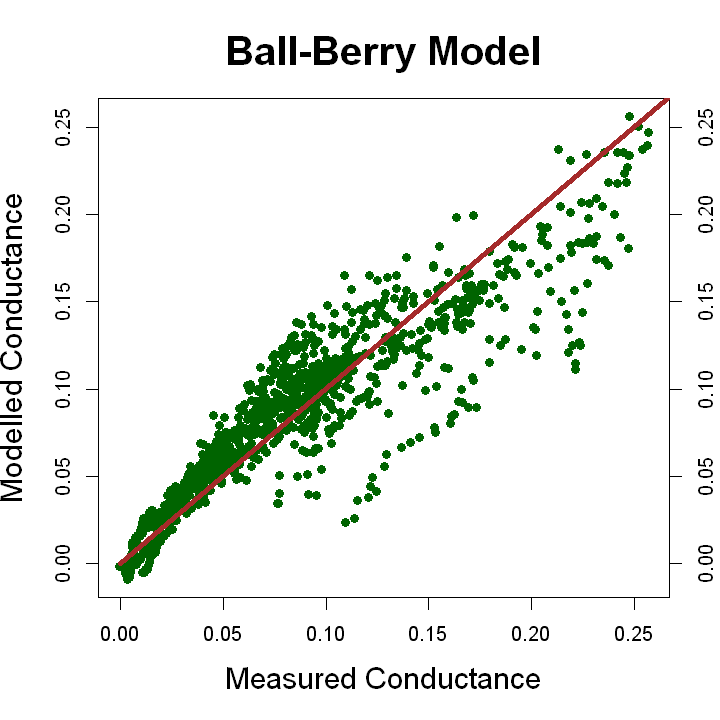

In [43]:
## fit to photosynthesis
options(repr.plot.width = 6, repr.plot.height = 6)
gs_modelled <- preds_BB
gs_measured <-daylight$Cond 
#initial plot of tracking data
plot( gs_measured,gs_modelled, pch = 16, col = 'darkgreen', ylab='Modelled Conductance', xlab = 'Measured Conductance', 
     main = 'Ball-Berry Model', cex.lab = 1.5, cex.main = 2)
#points(model_9$Cond, model_9_gs, col = 'blue')
lines(0:1, 0:1, col = 'brown', lwd = 4)
#legend(x = 'topleft', legend = c('g1 with g0', 'g1 without g0'), pch = 16, col = c('darkblue', 'brown'))
axis(1,cex = 1.25)
axis(4,cex = 1.25)

dev.copy(png, gsub(" ", "", paste(f,'/script_output_',f,'/BB_fit_',f,'.png')))
dev.off()